# ASTR3141 Project Report

Professor Younes kindly provides the raw data collects from NICER of a neutron star, called SGR 0501+4516. 
This project is focus on finding the five outliers of the "Time" array in the data set. I have also tried other ways to find the outliers for "Time" data.  From my perspective, the best approach to find the outliers easily is to use the z-score method. 

First of all, we have to import differnent libraries for further use. 
csv is for us to convert the original raw data file (.evt) to the standard excel file (.csv)
matplotlib.pyplot is for us to plot the scatter graph and any other graphs we need.
numpy is a library supports for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
sklearn, pandas and seasborn are used to find outliers, using methods like DBSCAN or kde. 

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
from sklearn.cluster import DBSCAN
from scipy.stats import kde
import seaborn as sns

Here, we have to define several functions we need to analysis further. When we try to find the break points of the "Time" data, we use 3 different methods, z-score method, modified z-score method and the IQR method. And the z-score method is the one that is closest to our observation to the data scatter plot. 

In [2]:
# Subtraction between two arrays
def self_sub(array1):
    array2 = array1[:]
    last_value = array1[len(array1) - 1]
    array2.pop(0)
    array2.append(last_value)

    nparray1 = np.asarray(array1, dtype=np.float64)
    nparray2 = np.asarray(array2, dtype=np.float64)

    out_num = np.subtract(nparray1, nparray2)
    return out_num

In [3]:
# Z-score method to find outliers
def outliers_z_score(ys):
    threshold = 3

    mean_y = np.mean(ys)
    print("The mean value of is", mean_y)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > threshold)

In [4]:
# Modified Z-score method to find outliers
def outliers_modified_z_score(ys):
    threshold = 3.5

    median_y = np.median(ys)
    print("The median value of is", median_y)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                             for y in ys]
    return np.where(np.abs(modified_z_scores) > threshold)

In [5]:
# IQR method
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

First, we need to convert the original raw data file (.evt) to the standard excel file (.csv). 
To do this conversion, we need to first use the fitsViewer application to open the original data file (.evt) and display the data set. Then choose to export the original data to text file, and then we change the file suffix name ".txt" to ".csv". Rename the csv file as "data1.csv" under the folder of the desktop. During this process, We have also successfully preserve the accuracy of the original data in the csv file.

In [6]:
# First, we read the data in the converted excel file (.csv).
data = pd.read_csv("C:/Users/GE63VR/Desktop/data1.csv")
with open("C:/Users/GE63VR/Desktop/data1.csv", "rt") as csvFile:
    marksReader = csv.reader(csvFile)

# Here we define two lists, with x and y. 
# x represents the line number, y represents the time corresponds to the line it is at. 
    x = []
    y = []
    for row in marksReader:
        x.append(row[0])
        y.append(row[1])

Before we move to the data analysis part, we have to examine the raw data by plotting it using matplotlib first. 

8


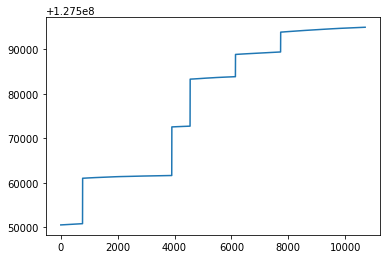

In [7]:
np_x_data = np.asarray(x, dtype=np.int32)
np_raw_data = np.asarray(y, dtype=np.float64)

x, data = np_x_data, np_raw_data
data_new = np.reshape(data, (-1,1))

outlier_detection = DBSCAN(min_samples = 100, eps = 22.67)
clusters = outlier_detection.fit_predict(data_new)
list_clusters = list(clusters).count(-1)
print(list_clusters)

plt.plot(x, data)
plt.show()

Now we have discovered the pattern of the data "Time", then our goal has changed to find out the outliers so to identify the boundaries of the data "Time". Here we use the subtration of numpy arrays to get a new array called "out". 

In [8]:
# Now we convert the list to numpy arrays. 
# But instead of converting the y to npy, we use the subtraction of two arrays, get the new array named "out".
npy = abs(self_sub(y))
npx = np.asarray(x, dtype=np.float64)

max_npy = np.amax(npy)
min_npy = np.amin(npy)
diff_npy = max_npy - min_npy
out = np.divide(npy, diff_npy)

In [9]:
# scipy db scan
# https://blog.dominodatalab.com/topology-and-density-based-clustering/
out = np.reshape(out, (-1,1))
dbsc = DBSCAN(eps=.5, min_samples=15).fit(out)
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype=bool)
core_samples[dbsc.core_sample_indices_] = True

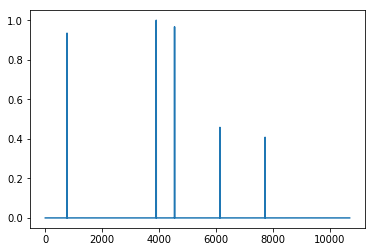

In [10]:
# plot re-plot
plt.plot(out)
plt.show()

Here we want to know more about how the data is distributed, by calculating the average, variance and standard deviation of the "Time" data. Also we know we have five break points in the original "Time" data. 

In [11]:
# average
arr_mean = np.mean(npy)
# variance
arr_var = np.var(npy)
# standard deviation
arr_std = np.std(npy, ddof=1)
print("The average of time values is：%f" % arr_mean)
print("The variance of time values is：%f" % arr_var)
print("The standard deviation of time values is:%f" % arr_std)

The average of time values is：4.153928
The variance of time values is：35521.626340
The standard deviation of time values is:188.480626


We know from the calculated average, variance and standard deviation that the data should be in a skew-right distribution.
From here, we should use methods to find the outliers.

In [12]:
# Using z-score method to find the break points. 
# Print the z-score method result.
print(outliers_z_score(out))

outlier_index = [764, 3900, 4544, 6138, 7726]
for i in outlier_index:
    print("The outlier is at index", i) 
    print(" and the 'time' array data is", npy[i])

The mean value of is 0.00038013835581474515
(array([ 764, 3900, 4544, 6138, 7726], dtype=int64), array([0, 0, 0, 0, 0], dtype=int64))
The outlier is at index 764
 and the 'time' array data is 10214.00290544331
The outlier is at index 3900
 and the 'time' array data is 10927.40968722105
The outlier is at index 4544
 and the 'time' array data is 10564.517845407128
The outlier is at index 6138
 and the 'time' array data is 5005.228042408824
The outlier is at index 7726
 and the 'time' array data is 4457.384169176221


We have successfully find the five outlierss in the original data by using the z-score method. 
Below are other two methods we use but they don't meet with our expectation. 

In [13]:
# Using modified z-score method to find the five outliers
# print(outliers_modified_z_score(out))

In [14]:
# # Using IQR method to find the five outliers
# print(outliers_iqr(npy))

Below, we have also tried to use boxplot to find outliers, and other methods. But the results differ differently. So we will not discuss any further. Here is the link for reference: https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623

In [15]:
# sns.boxplot(data=out)

print("end")

end
